# Forest Offsets Paper - Supplementary Figure 1


In [1]:
import os
import fsspec
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

## Load the data


In [2]:
with fsspec.open(
    "https://carbonplan.blob.core.windows.net/carbonplan-forests/offsets/archive/results/crediting-verification.json",
    "r",
) as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame()
df["calculated"] = [d["calculated"] for d in data]
df["issued"] = [d["issued"] for d in data]

## Make the plot


In [4]:
def format_si(num, precision=0, suffixes=["", "K", "M", "G", "T", "P"], show_suffix=False):
    m = sum([abs(num / 1000.0 ** x) >= 1 for x in range(1, len(suffixes))])
    if show_suffix:
        return f"{num/1000.0**m:.{precision}f}{suffixes[m]}"
    else:
        return f"{num/1000.0**m:.{precision}f}"


@ticker.FuncFormatter
def formatter(x, pos):
    return format_si(x)

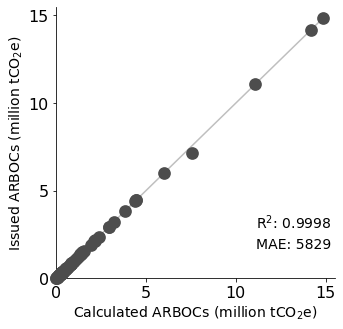

In [5]:
plt.rcParams.update({"font.size": 14, "svg.fonttype": "none"})

fig, ax = plt.subplots(1, 1, figsize=[5, 5])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.scatter(
    df["calculated"],
    df["issued"],
    marker=".",
    s=500,
    color=".3",
    lw=1.5,
    label="Common practice",
    zorder=10,
    clip_on=False,
)
ax.plot([0, 15000000], [0, 15000000], "-", color=(0.75, 0.75, 0.75))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim([0, 15500000])
ax.set_xlim([0, 15500000])
ax.set_xticks([0, 5000000, 10000000, 15000000])
ax.set_yticks([0, 5000000, 10000000, 15000000])
ax.set_ylabel("Issued ARBOCs (million tCO$_2$e)")
ax.set_xlabel("Calculated ARBOCs (million tCO$_2$e)")
ax.tick_params(labelsize=16)
ax.annotate(
    f'R$^2$: {np.corrcoef([df["calculated"], df["issued"]])[0,1] ** 2:.4f}',
    xy=(200, 50),
    xycoords="axes points",
)
ax.annotate(
    f'MAE: {np.mean((df["calculated"] - df["issued"])):.0f}', xy=(200, 30), xycoords="axes points"
)

fname = "Supplementary-Figure-1.svg"
if "BLOB_ACCOUNT_KEY" in os.environ:
    with fsspec.open(
        f"az://carbonplan-forests/offsets/figures/raw/{fname}",
        "w",
        account_name="carbonplan",
        account_key=os.environ["BLOB_ACCOUNT_KEY"],
    ) as f:
        fig.savefig(f, format="svg")
else:
    plt.savefig(fname)